# Customer analysis in marketing campaigns

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the marketing team of a grocery store. They would like to find which are the ideal customers according to the results of the last marketing campaigns. Your analysis will be helpful to adapt and modify products according to the different needs and behavior of their customers.

You dispose of a dataset from the mall dataset with several features:


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

'Z_CostContact' and 'Z_Revenue' contains constant value across all the observations and therefore they will not contribute anything in the analysis.

Use the recent know datetime in the dataset to estimate the age of customers

You have two days to do this study

In [1]:
import pandas as pd
import numpy as np

In [2]:
campaign_df = pd.read_csv('data/marketing_campaign.csv', sep="\t")
campaign_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [71]:
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
campaign_df.shape

(2240, 29)

# EDA

In [65]:
campaign_df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
M                       0
F                       0
dtype: int64

In [56]:
import matplotlib.pyplot as plt

In [41]:
import seaborn as sns

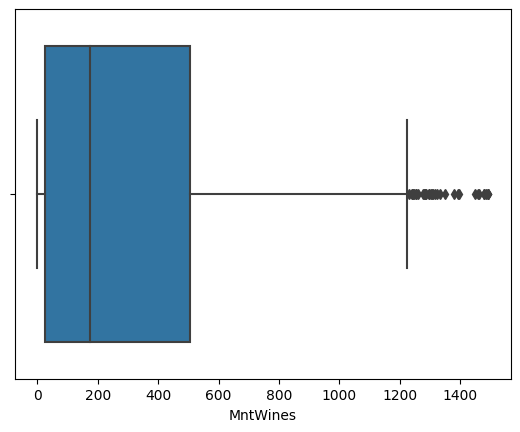

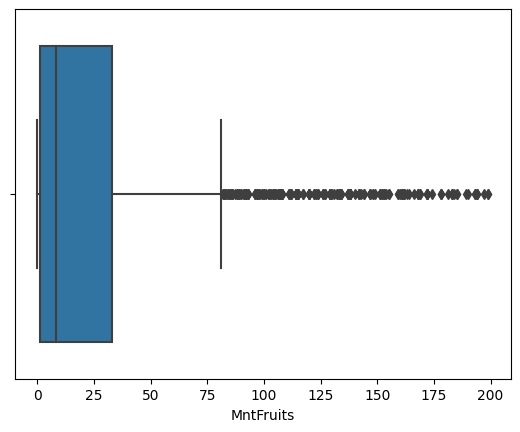

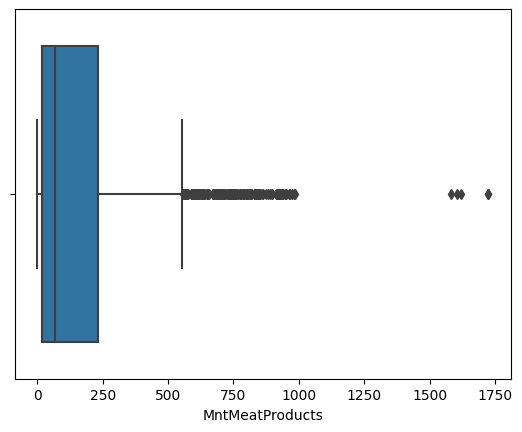

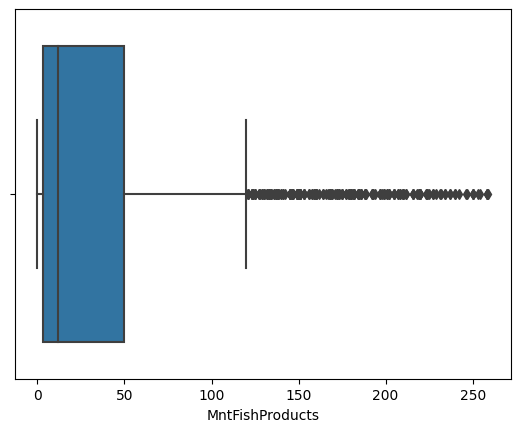

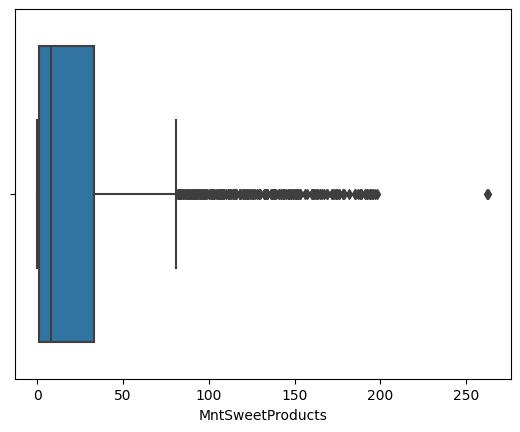

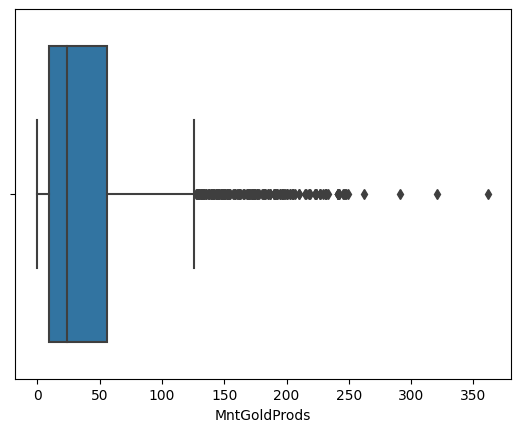

In [57]:
for i,col in enumerate(montants) : 
    plt.figure(i)
    sns.boxplot(data=campaign_df,x=col)

<AxesSubplot:xlabel='M'>

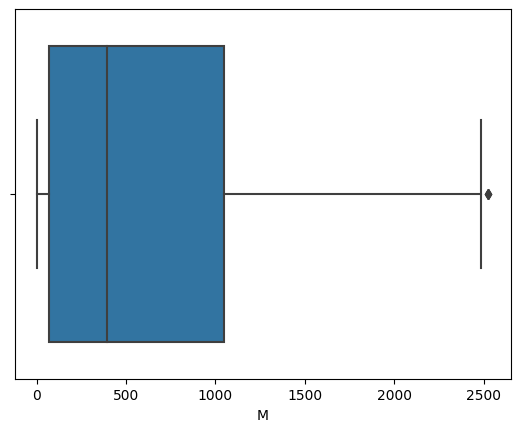

In [46]:
sns.boxplot(data=campaign_df,x='M')

In [78]:
from scipy import stats

In [87]:
q = campaign_df["Income"].quantile(0.99)

In [92]:
campaign_df[campaign_df["Income"] > q]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,M,F
124,7215,1983,Graduation,Single,101970.0,0,0,12-03-2013,69,722,...,2,0,1,1,1,0,0,1,1135,27
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,0,0,1608,22
203,2798,1977,PhD,Together,102160.0,0,0,02-11-2012,54,763,...,4,0,1,1,1,0,0,1,1240,26
252,10089,1974,Graduation,Divorced,102692.0,0,0,05-04-2013,5,168,...,2,0,1,1,1,1,0,1,1112,28
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,...,1,0,0,0,0,0,0,0,107,1
646,4611,1970,Graduation,Together,105471.0,0,0,21-01-2013,36,1009,...,3,0,0,1,1,0,0,1,1724,30
650,4248,1960,Master,Single,98777.0,0,0,17-02-2014,23,1000,...,1,0,1,0,0,0,0,0,2008,19
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,0,0,0,0,0,0,0,6,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,0,0,1717,29
914,10619,1994,Graduation,Single,95529.0,0,0,03-12-2012,29,770,...,3,0,0,1,0,0,0,1,1990,17


In [90]:
campaign_df_so=campaign_df[campaign_df["Income"] < q]

<AxesSubplot:xlabel='Income'>

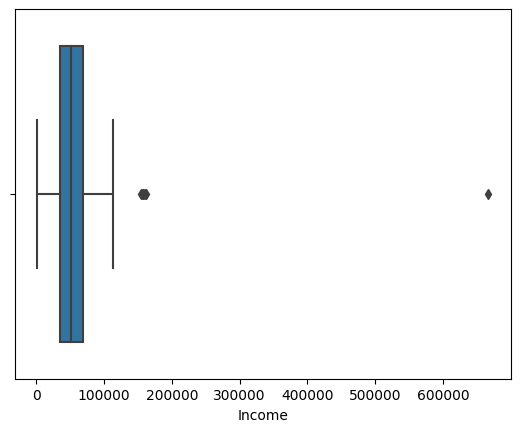

In [77]:
sns.boxplot(data=campaign_df,x='Income')

In [15]:
campaign_df['Complain'].value_counts(normalize=True)

0    0.990625
1    0.009375
Name: Complain, dtype: float64

In [29]:
campaigns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

In [43]:
x=[]
y=[]
for i,col in enumerate (campaigns) :
    x.append(i)
    y.append(campaign_df[col].value_counts(normalize=True).values[1])

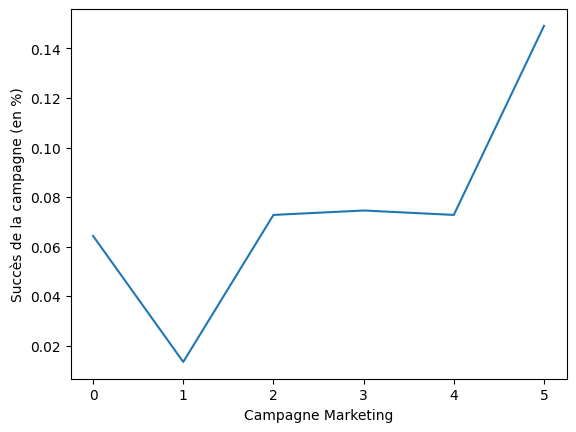

In [58]:
ax = sns.lineplot(x=x,y=y)
ax.set(xlabel='Campagne Marketing', ylabel='Succès de la campagne (en %)')
plt.show()

/home/tristanlm/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

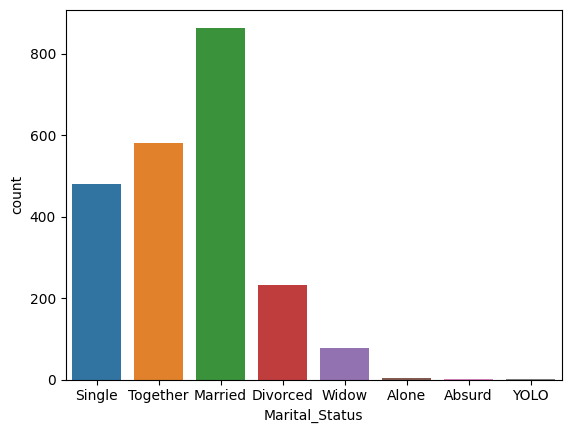

In [60]:
sns.countplot(campaign_df['Marital_Status'])

/home/tristanlm/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

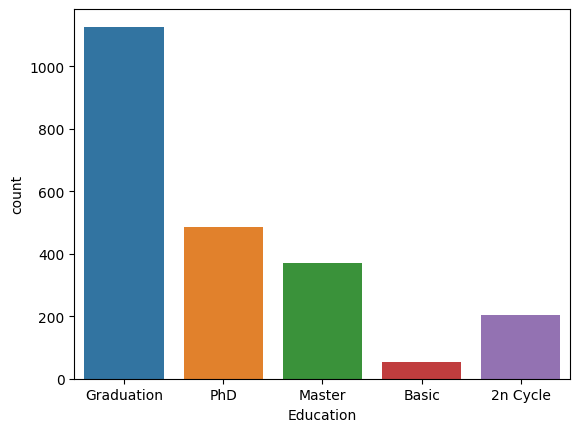

In [61]:
sns.countplot(campaign_df['Education'])

<AxesSubplot:xlabel='M', ylabel='F'>

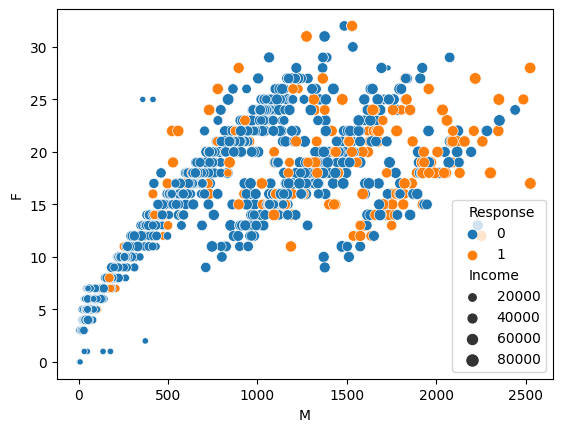

In [91]:
sns.scatterplot(data=campaign_df_so,x='M',y='F',hue='Response',size='Income')

<AxesSubplot:xlabel='M', ylabel='Income'>

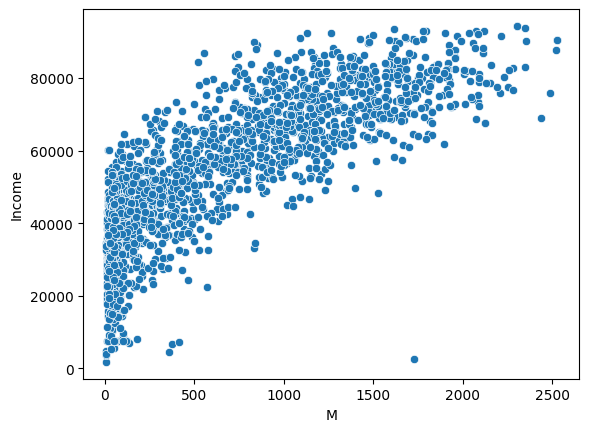

In [93]:
sns.scatterplot(data=campaign_df_so,x='M',y='Income')

# Customer Segmentation

In [4]:
campaign_df=campaign_df.drop(['Z_CostContact','Z_Revenue'],axis=1)

In [6]:
montants=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

In [7]:
campaign_df['M']=campaign_df[montants].sum(axis=1)

In [10]:
frequences=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

In [11]:
campaign_df['F']=campaign_df[frequences].sum(axis=1)

In [95]:
campaign_df['F'].value_counts().sort_index()

0       6
1       6
2       2
3     128
4     202
5     180
6     191
7     128
8      51
9      45
10     54
11     77
12     64
13     75
14    100
15     84
16     98
17     89
18    104
19     85
20     85
21     86
22     75
23     64
24     52
25     39
26     24
27     23
28     10
29      6
30      2
31      2
32      3
Name: F, dtype: int64

In [98]:
campaign_df.rename(columns={'Recency': 'R'},inplace=True)

In [194]:
campaign_df['R_score'] = pd.qcut(-(campaign_df['R']), q=3, labels=[1, 2, 3])

In [195]:
for col in ['F','M']:
    campaign_df[col+'_score'] = pd.qcut(-(campaign_df[col]), q=3, labels=[3, 2, 1])

In [196]:
campaign_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,R,MntWines,...,AcceptedCmp2,Complain,Response,M,F,R_score,F_score,M_score,cluster,cluster_group
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,1,1617,22,2,3,3,1-3-3,bons_clients_risques
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,27,4,2,1,1,3-1-1,clients récents
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,776,20,3,3,2,2-3-2,potentiels_loyaux
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,53,6,3,1,1,3-1-1,clients récents
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,422,14,1,2,2,2-2-2,petits_clients_perdition


In [197]:
campaign_df['cluster']=campaign_df['R_score'].astype(str) + '-' + campaign_df['F_score'].astype(str) + '-' + campaign_df['M_score'].astype(str)

In [198]:
campaign_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,R,MntWines,...,AcceptedCmp2,Complain,Response,M,F,R_score,F_score,M_score,cluster,cluster_group
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,1,1617,22,2,3,3,2-3-3,bons_clients_risques
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,27,4,2,1,1,2-1-1,clients récents
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,776,20,3,3,2,3-3-2,potentiels_loyaux
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,53,6,3,1,1,3-1-1,clients récents
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,422,14,1,2,2,1-2-2,petits_clients_perdition


In [199]:
def cluster(champions:list, clients_risques:list, potentiels_loyaux:list,
            clients_perdition:list, one_shot:list, clients_récents:list):   
    # Regroupement par catégorie     
    cluster = []
    for i in campaign_df["cluster"]:
        if i in champions:
            cluster.append("champions")
        elif i in bons_clients_risques:
            cluster.append("bons_clients_risques")
        elif i in potentiels_loyaux:
            cluster.append("potentiels_loyaux")
        elif i in petits_clients_perdition: 
            cluster.append("petits_clients_perdition")
        elif i[0:3] == "1-1" or i[0:3] == "2-1":
            cluster.append("one-shot")
        elif i in clients_récents:
            cluster.append("clients récents")
        else:
            cluster.append("pas de cluster")
    # Insertion de la colonne             
    campaign_df["cluster_group"] = cluster
    return campaign_df

In [200]:
champions                = ["3-2-3", "3-3-2", "3-3-3", "2-3-3"]
bons_clients_risques     = ["1-3-3", "1-3-2", "1-2-3"]
potentiels               = ["3-2-2", "3-2-2", "2-3-2", "2-2-3"]
petits_clients_perdition = ["1-2-2", "2-2-2", "2-2-1", "1-3-1", "1-2-1", "2-3-1"] 
one_shot                 = ["1-1"]
clients_récents          = ["3-1-1","3-1-3","3-1-2","3-3-1","3-1-2", "3-2-1" ]

In [201]:
clusters=cluster(champions, bons_clients_risques, potentiels_loyaux, petits_clients_perdition, one_shot, clients_récents)

In [202]:
clusters

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,R,MntWines,...,AcceptedCmp2,Complain,Response,M,F,R_score,F_score,M_score,cluster,cluster_group
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,1,1617,22,2,3,3,2-3-3,champions
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,27,4,2,1,1,2-1-1,one-shot
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,776,20,3,3,2,3-3-2,champions
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,53,6,3,1,1,3-1-1,clients récents
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,422,14,1,2,2,1-2-2,petits_clients_perdition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,1341,16,2,2,3,2-2-3,potentiels_loyaux
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,444,15,2,2,2,2-2-2,petits_clients_perdition
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,1241,18,1,3,3,1-3-3,bons_clients_risques
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,843,21,3,3,3,3-3-3,champions


/home/tristanlm/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster_group', ylabel='count'>

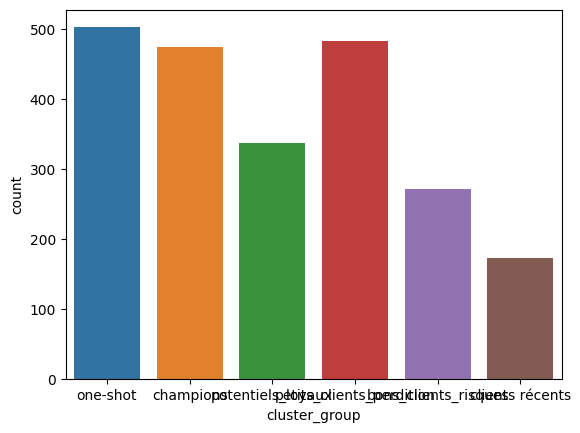

In [117]:
sns.countplot(clusters['cluster_group'])

/home/tristanlm/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster_group', ylabel='count'>

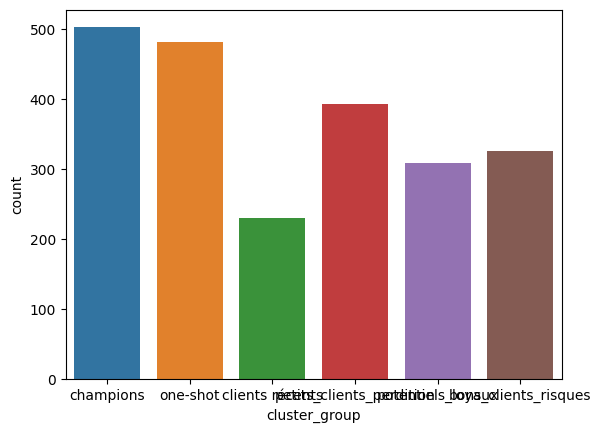

In [203]:
sns.countplot(clusters['cluster_group'])

<AxesSubplot:xlabel='M', ylabel='R'>

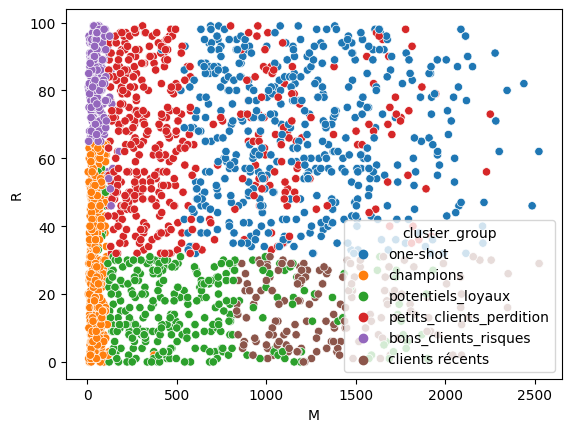

In [121]:
sns.scatterplot(data=clusters,x='M',y='R',hue='cluster_group')

In [204]:
fig = px.scatter_3d(clusters, x='R',y='F',z='M',color='cluster_group', opacity=0.8)
fig.show()

In [191]:
fig = px.scatter_3d(clusters, x='R_score',y='F_score',z='M_score',color='cluster_group', opacity=0.8)
fig.show()

In [134]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [156]:
model=KMeans(n_clusters=6)

In [157]:
model.fit(X)
y_pred = model.predict(X)

In [158]:
print("Silhouette Score :"  + str(silhouette_score(X, y_pred)),
"Calinski-Harabasz :" + str(calinski_harabasz_score(X, y_pred)),
"Davies-Bouldin :"    + str(davies_bouldin_score(X, y_pred)))

Silhouette Score :0.6043466393177478 Calinski-Harabasz :15961.177599167844 Davies-Bouldin :0.5326160443699307


In [159]:
X['y_pred']=y_pred

/tmp/ipykernel_2014/445552388.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [161]:
fig = px.scatter_3d(X, x='R',y='F',z='M',color='y_pred', opacity=0.8)
fig.show()

<AxesSubplot:xlabel='M', ylabel='F'>

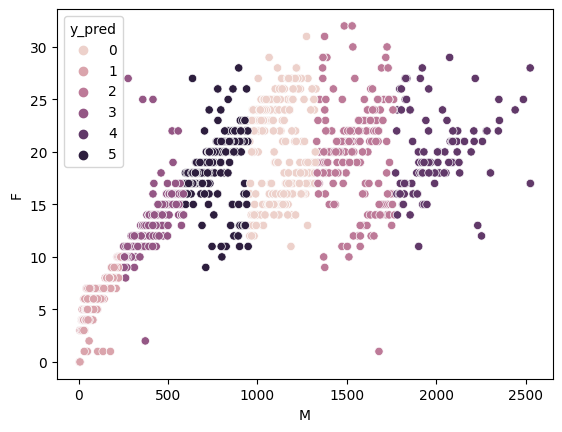

In [160]:
sns.scatterplot(data=X,x='M',y='F',hue='y_pred')

In [162]:
model=AgglomerativeClustering(n_clusters=6)

In [163]:
y_pred = model.fit_predict(X)

In [164]:
print("Silhouette Score :"  + str(silhouette_score(X, y_pred)),
"Calinski-Harabasz :" + str(calinski_harabasz_score(X, y_pred)),
"Davies-Bouldin :"    + str(davies_bouldin_score(X, y_pred)))

Silhouette Score :0.5617814440819846 Calinski-Harabasz :11739.467557689239 Davies-Bouldin :0.5498867222480006


In [166]:
X['y_pred']=y_pred

/tmp/ipykernel_2014/445552388.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='M', ylabel='F'>

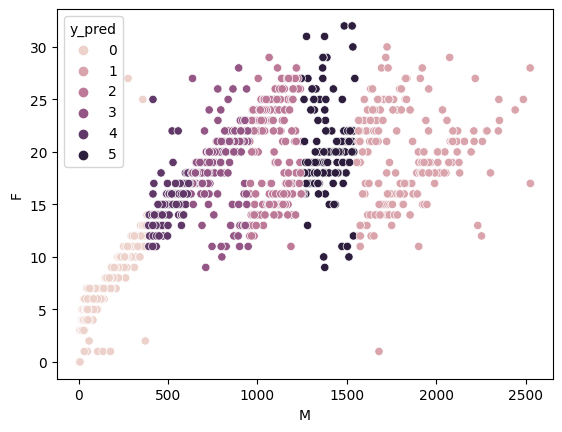

In [167]:
sns.scatterplot(data=X,x='M',y='F',hue='y_pred')

In [168]:
fig = px.scatter_3d(X, x='R',y='F',z='M',color='y_pred', opacity=0.8)
fig.show()

<AxesSubplot:xlabel='M', ylabel='F'>

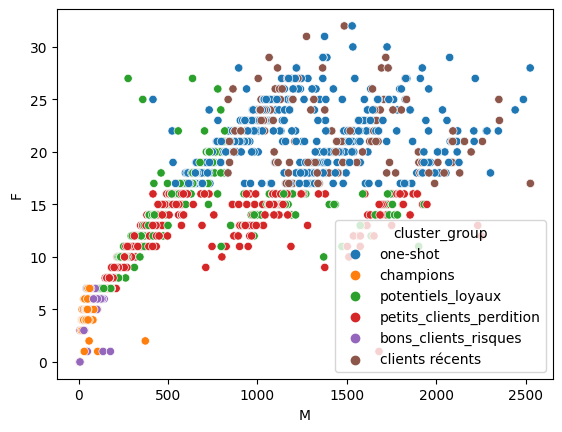

In [133]:
sns.scatterplot(data=clusters,x='M',y='F',hue='cluster_group')

In [119]:
import plotly.express as px

In [124]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [125]:
X=clusters[['R','F','M']]
y_pred=clusters['cluster_group']

In [129]:
print(silhouette_score(X, y_pred),calinski_harabasz_score(X, y_pred),davies_bouldin_score(X, y_pred))

-0.021070769623376402 816.476783188243 6.655321394687715


# Conlusions